# Python3 实战——文件读取

作者： Daniel Meng

GitHub： [LibertyDream](https://github.com/LibertyDream)

博客：[明月轩](https://libertydream.github.io/)

> 本系列教程采用[知识共享署名-非商业性使用-相同方式共享 2.5 中国大陆许可协议](http://creativecommons.org/licenses/by-nc-sa/2.5/cn/)

- [读取 zip 文件](#读取-zip-文件)
- [读取 Text 文件](#读取-Text-文件)
- [用 Pandas 导入 CSV 文件](#用-Pandas-导入-CSV-文件)
- [读取 Excel 文件](#读取-Excel-文件)
- [从数据库导入](#从数据库导入)
- [JSON 文件处理](#JSON-文件处理)
- [读取 Pickle 文件](#读取-Pickle-文件)
- [网络爬虫](#网络爬虫)
- [用 PIL 读取图像](#用-PIL-读取图像)
- [用 Glob 读取多个文件](#用-Glob-读取多个文件)

### 读取 zip 文件

压缩文件能帮助我们节省空间和时间。ZIP 是种存档文件，支持无损数据压缩。用 Python 打开 ZIP 文件夹先得有 **Zip File** 库。

本文所有文件都已打包进独立 ZIP 文件中，来提取看看吧。

In [1]:
from zipfile import ZipFile

# 压缩文件路径
file = './data/demo data.zip'

# 读取并解压内容
with ZipFile (file, 'r') as zip:
    zip.printdir()
    zip.extractall(path='./data/demo data')

File Name                                             Modified             Size
Beijing/                                       2021-01-09 21:55:24            0
Beijing/1.jpg                                  2021-01-09 22:00:28        14363
Beijing/2.jpg                                  2021-01-09 22:00:28        10942
Beijing/3.jpg                                  2021-01-09 22:00:28         5100
Beijing/4.jpg                                  2021-01-09 22:00:28         4142
Beijing/5.jpg                                  2021-01-09 22:00:28         6914
Beijing/6.jpg                                  2021-01-09 22:00:28         4493
Beijing/7.jpg                                  2021-01-09 22:00:28         4518
Beijing/8.jpg                                  2021-01-09 22:00:28        12041
Employee.txt                                   2021-01-09 22:00:28           85
Liberty Dream.txt                              2021-01-09 22:00:28          163
Products.csv                            

执行上面的代码后，可以在同目录下的 `apply/data/demo data` 文件夹中看到相同结构内容

![](https://raw.githubusercontent.com/LibertyDream/diy_img_host/master/img/2020-12-29_release_dic.png)

### 读取 Text 文件

 文本文件算是最常见的文件格式了。Python 用 `open()` 方法读取指定路径的文件，并用参数指定访问方式。读文件模式为 `r`，还有其他访问模式：

- `w` —— 写入文件
- `r+` 或 `w+` —— 读取并写入文件
- `a` —— 追加到既有文本后面
- `a+` —— 读取后再追加

Python 提供了三种方法读取文本文件：

1. `read(n)` – 从文本中读取 n 个字符，不指定数字就读取全部。可以自动识别定界符并分隔句子。
2. `readline(n)` – 从文件中读取 n 个字符，但不超过一行
3. `readlines()` – 读取全部信息，但不同于 `read()`，该方法不会管分隔符，将其一并读入列表

来看看这些方法读文件时的异同吧：

In [2]:
# 读取 text 文件,指定解码格式为 utf-8
with open(r'./data/demo data/Liberty Dream.txt','r',encoding='utf-8') as f:
    print(f.read())

欢迎来到 Python 文件导入教程。我们会关注以下文件类型的处理：
1. Text
2. CSV
3. Excel
4. SQL
5. Web 数据
6. Image
阅读愉快！


`read()` 方法成功以结构化的方式读入了所有数据。

In [3]:
# 读取 text 文件,读取 n 个字节
with open(r'./data/demo data/Liberty Dream.txt','r',encoding='utf-8') as f:
    print(f.read(4))

欢迎来到


给 `read()` 指定一个数后，可以读取定量的字符

In [4]:
# 按行读取 text 文件
with open(r'./data/demo data/Liberty Dream.txt','r',encoding='utf-8') as f:
    print(f.readline())

欢迎来到 Python 文件导入教程。我们会关注以下文件类型的处理：



用了 `readline()`，只读了一行文本进来

In [5]:
# 将 text 文件解析成列表
with open(r'./data/demo data/Liberty Dream.txt','r',encoding='utf-8') as f:
    print(f.readlines())

['欢迎来到 Python 文件导入教程。我们会关注以下文件类型的处理：\n', '1. Text\n', '2. CSV\n', '3. Excel\n', '4. SQL\n', '5. Web 数据\n', '6. Image\n', '阅读愉快！']


这里 `readlines()` 方法将整个文本提取成了列表格式。

### 用 Pandas 导入 CSV 文件

经典的 CSV 格式。CSV（ Comma Separated Value，字符分隔值）文件算是数据科学行业里最常见的文件类型了。这类文件用 `,` 作分隔符分隔数据值，文件中的一行就是一条数据记录。如果用 Notepad 打开，你会看到类似这样的数据格式：

![](https://raw.githubusercontent.com/LibertyDream/diy_img_host/master/img/2020-12-30_csv_file_demo.png)


通过 [Pandas](https://pandas.pydata.org/) 库可以很方便的用 `read_csv()` 方法读取 CSV 文件

In [6]:
import pandas as pd

# 读取文件为 DataFrame
df = pd.read_csv(r'./data/demo data/Products.csv')

df

,ID,Product,Price
0,1,Pen,10
1,2,Pencil,5
2,3,Eraser,2
3,4,Notebook,40
4,5,Stapler,60


但数据值里包括逗号的话 CSV 文件就会遇到问题。这可以靠采用不同分隔符解决，比如 `\t` 或 `;` 等：

In [7]:
import pandas as pd

df = pd.read_csv(r'./data/demo data/Employee.txt',delimiter='\t')
df

,"ID,Name,Job"
0,"1,Tom,Full Stack"
1,"2,Jerry,Frontend"
2,"3,Merry,Backend"
3,"4,Jack,Data Science"


### 读取 Excel 文件

想必你对 Excel 文件不会陌生，谈到表格类数据必定少不了它。Pandas 提供了一个很方便的方法 `read_excel()` 读取 Excel 文件：

In [8]:
import pandas as pd

df = pd.read_excel(r'./data/demo data/World_city.xlsx')

df

,ID,City,Country
0,1,Beijing,China
1,2,Tokyo,Japan
2,3,New Delhi,India
3,4,Seoul,South Koera


但 Excel 文件通常有多个表单，此时可以用 Pandas 的 `ExcelFile()` 方法打印文件内所有表单名称：

In [9]:
# pandas 读取 Excel sheets

xls = pd.ExcelFile(r'./data/demo data/World_city.xlsx')

xls.sheet_names

['Asia', 'Europe', 'Africa']

这样我们就可以通过参数 `sheet_name` 借助 `read_excel()` 方法读取任意表单内的数据了：

In [10]:
# 读取欧洲表单

df = pd.read_excel(r'./data/demo data/World_city.xlsx', sheet_name='Europe')

df

,ID,City,Country
0,1,London,Britain
1,2,Pairs,France
2,3,Berlin,Germany
3,4,Moscow,Russia


### 从数据库导入

实际项目中，免不了从项目数据库中提取数据（所以 SQL 还是得学滴）。数据在数据库中是以表格形式存储的，（一般）这些系统又名关系数据库管理系统（RDBMS），访问不同数据库需要不同的 PYthon 模块支持，比如 SQLite 需要 sqlite3，MySQL 需要 mysql-connector。

一般的数据访问步骤为：

1. 用 `connect()` 创建一个数据库连接，需要传入要访问的数据库名。它会返回一个 Connection 对象
2. 用 `cursor()` 创建一个 cursor 对象，通过它实现操作数据的 SQL 指令
3. 调用指针对象的 `execute()` 方法执行 SQL 命令。检索数据会用到 `SELECT` 语句，并将查询存入一个对象
4. 将对象内数据读入 DataFrame 可以通过 `fetchone()` 读入一行，或是 `fetchcall()` 读取所有行

一个好习惯是，即使只是读取数据，也用 `commit()` 方法将你的事务保存/提交。

In [11]:
from getpass import getpass
from mysql.connector import connect, Error

# 连接数据库
try:
     db=connect(
        host="localhost",
        user=input("Enter username: "),
        passwd=getpass("Enter password: "),
        database="nba",
        auth_plugin='mysql_native_password'
    )
except Error as e:
    print(e)
    
# 获取游标
cursor = db.cursor()

# 执行查询操作
cursor.execute("SELECT * FROM player LIMIT 10")

df = pd.DataFrame(cursor.fetchall())

db.commit()

df

Enter username: root
Enter password: ········


,0,1,2,3
0,10001,1001,韦恩-艾灵顿,1.93
1,10002,1001,雷吉-杰克逊,1.91
2,10003,1001,安德烈-德拉蒙德,2.11
3,10004,1001,索恩-马克,2.16
4,10005,1001,布鲁斯-布朗,1.96
5,10006,1001,兰斯顿-加洛韦,1.88
6,10007,1001,格伦-罗宾逊三世,1.98
7,10008,1001,伊斯梅尔-史密斯,1.83
8,10009,1001,扎扎-帕楚里亚,2.11
9,10010,1001,乔恩-洛伊尔,2.08


In [12]:
team_id = int(input("team id: "))
height = float(input("height: "))

select_query ="""
SELECT player_id,player_name FROM player
WHERE team_id=%d AND height > %f;
""" % (team_id, height)

cursor.execute(select_query)

df = pd.DataFrame(cursor.fetchall())

db.commit()

df

team id: 1001
height: 1.96


,0,1
0,10003,安德烈-德拉蒙德
1,10004,索恩-马克
2,10007,格伦-罗宾逊三世
3,10009,扎扎-帕楚里亚
4,10010,乔恩-洛伊尔
5,10011,布雷克-格里芬
6,10012,雷吉-巴洛克
7,10014,斯坦利-约翰逊
8,10015,亨利-埃伦森
9,10018,斯维亚托斯拉夫-米凯卢克


In [13]:
# 关闭数据库
cursor.close()
db.close()

### JSON 文件处理

**JSON (JavaScript Object Notation)** 是用于数据存储、交换的轻量可读文件格式。机器很容易解析、生成这些文件。

JSON 中的数据用类似 Python 字典的方式存在 `{}` 中，JSON 是语言独立的，一般文件长这样：

![](https://raw.githubusercontent.com/LibertyDream/diy_img_host/master/img/2020-12-31_json_style.png)

Python 提供了 `json` 模块来读取 JSON 文件，像读文本一样简单。只不过这里的读方法变成了 `json.load()`，其返回一个 JSON 字典。

接着就可以用 `pandas.DataFrame()` 方法将其转换成 Pandas dataframe 格式了。

In [14]:
import json

with open(r'./data/demo data/sample_json.json','r') as file:
    data = json.load(file)
    
print(type(data))

df_json = pd.DataFrame(data)
df_json

<class 'dict'>


,firstName,lastName,age
0,Jane,Doe,35
1,Teddy,Dunken,40


你甚至可以用 `pandas.read_json()` 直接将 JSON 文件读入 dataframe：

In [15]:
path = r'./data/demo data/sample_json.json'
df = pd.read_json(path)
df

,firstName,lastName,age
0,Jane,Doe,35
1,Teddy,Dunken,40


### 读取 Pickle 文件

Pickle 文件常用于存储 Python 序列化对象，也就是说像 list，set，tuple，dict 这些在存入磁盘前先被转换成了字符流。这可以让你之后继续使用对象，当训练完模型想存起来之后预测用时，这就能派上用场了。

所以，如果存储前将文件序列化了，用之前就得先反序列化，这可以通过 `pickle` 模块的 `pickle.load()` 方法实现。在用 `open()` 打开 pickle 文件时候记得得用 `rb` 做参数，相应的，写入时记得用 `wb`。

In [16]:
import pickle
import pandas as pd

pickle_data = {'Name':['Tom','Jerry'],'Company':['Apple','Google'],
                'Job':['Intern','Full time']}

with open(r'./data/demo data/sample_pickle.pkl','wb') as fw:
    pickle.dump(pickle_data, fw)

with open(r'./data/demo data/sample_pickle.pkl','rb') as fo:
    read_data = pickle.load(fo)
    
print(type(read_data))

df = pd.DataFrame(read_data)

df

<class 'dict'>


,Name,Company,Job
0,Tom,Apple,Intern
1,Jerry,Google,Full time


### 网络爬虫

网络爬虫就是从网络上抓取海量数据，这对要分析数据的数据科学家来讲很重要。

Python 提供了 `requests` 模块方便我们从网络获取数据。`requests.get()` 方法接收一个 URL 参数并返回相应的 HTML 结果。其工作流程可以概括为：

1. 将 Get 请求打包来从网页检索数据
2. 将请求发给服务器
3. 收到 HTML 答复并存入 response 对象

比如想了解北京市，从维基百科抓获的数据形式如下

In [17]:
import requests

web_resp = requests.get('https://zh.wikipedia.org/wiki/%E5%8C%97%E4%BA%AC%E5%B8%82')

# response 对象 text 属性，将网页 HTML 作为字符串返回
print(web_resp.text)

<!DOCTYPE html>
<html class="client-nojs" lang="zh" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>北京市 - 维基百科，自由的百科全书</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"zh","wgMonthNames":["","1月","2月","3月","4月","5月","6月","7月","8月","9月","10月","11月","12月"],"wgRequestId":"X-ld-wpAAL8AAvn2aXcAAACI","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"北京市","wgTitle":"北京市","wgCurRevisionId":63604485,"wgRevisionId":63604485,"wgArticleId":463,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["有参考文献错误的页面","CS1英语来源 (en)","CS1含有中文文本 (zh)","引文格式1错误：日期","含有访问日期但无网址的引用的页面","CS1俄语来源 (ru)","CS1美国英语来源 (en-us)","顶注重定向需要审阅的条目","维基数据存在坐标数据的页面","使用多个图像且自动缩放的页面",
"含有非中文內容的條目","嵌入hAudio微格式的條目","包含AAT标识符的维基百科条目","包含BNF标识符的维基百科条目","包含GND标识符的维基百科条目","包含ISNI标识符的维基百科条目"

但如你所见，数据可读性并不怎么好，请求返回的内容没有很好的展示 HTML 的树形结构。为改善可读性，Python 提供了另一个很棒的 `BeautifulSoup` 库。

BeautifulSoup 是用来解析 HTML 树形结构并提取 HTML 内容的一个库。_更多爬虫内容见[教程](https://www.analyticsvidhya.com/blog/2019/10/web-scraping-hands-on-introduction-python/?utm_source=blog&utm_medium=how-to-read-common-file-formats-python)_

用的时候把得到的答复文本传给 `BeautifulSoup()`，它会创建自己的“soup”对象。调用 BeautifulSoup 对象的 `prettify()` 解析 HTML 内容树

In [18]:
from bs4 import BeautifulSoup

web_text = BeautifulSoup(web_resp.text, 'html.parser')

print(web_text.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="zh">
 <head>
  <meta charset="utf-8"/>
  <title>
   北京市 - 维基百科，自由的百科全书
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"zh","wgMonthNames":["","1月","2月","3月","4月","5月","6月","7月","8月","9月","10月","11月","12月"],"wgRequestId":"X-ld-wpAAL8AAvn2aXcAAACI","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"北京市","wgTitle":"北京市","wgCurRevisionId":63604485,"wgRevisionId":63604485,"wgArticleId":463,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["有参考文献错误的页面","CS1英语来源 (en)","CS1含有中文文本 (zh)","引文格式1错误：日期","含有访问日期但无网址的引用的页面","CS1俄语来源 (ru)","CS1美国英语来源 (en-us)","顶注重定向需要审阅的条目","维基数据存在坐标数据的页面","使用多个图像且自动缩放的页面",
"含有非中文內容的條目","嵌入hAudio微格式的條目","包含AAT标识符的维基百科条目","包含BNF标识符的维基百科条目","包含GND标识符的维基百科条目",

输出格式发生了明显变化。现在，可以通过 soup 对象的 `title` 属性来查看网页标题了

In [19]:
web_text.title

<title>北京市 - 维基百科，自由的百科全书</title>

网页上有很多北京的名胜古迹与地标照片，不妨把它们存到本地文件夹里。

这要用到 python 的 `urlib` 库来检索要保存图片的 URL，它有一个 `urllib.request()` 方法用来打开和读取 URL，调用该对象的 `urlretrieve()` 方法可以将 URL 表示的对象下到本地文件中：

In [20]:
import urllib

def download_img(url, i):
    
    # 提前建好文件夹
    folder = r'./data/demo data/Beijing/'
    
    # 图像存储路径
    filepath = folder + str(i) + '.jpg'
    
    # 检索图像并存入文件夹
    urllib.request.urlretrieve(url, filepath)

图像都存在 HTML 的“img”标签下，可以调用 soup 对象的 `find_all()` 将他们找出来。然后就可以遍历图像，用 image 对象的 `get()` 获取原图。

In [21]:
images = web_text.find_all("img")

i = 1

for image in images[2:10]:
    try:
        download_img('https:' + image.get('src'), i)
        i = i+1
    except:
        continue

### 用 PIL 读取图像

在用 CNN 之类的技术分析图像前，总得先知道怎么把图像读进来。以上面存好的图像为例，为此你需要用到 Python 的 [PIL](https://pillow.readthedocs.io/en/stable/)(Python Image Library) 库。

调用 PIL 里 Image 模块的 `open()` 方法并把图像路径传进去：

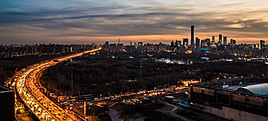

In [22]:
from PIL import Image

filename = r'./data/demo data/Beijing/1.jpg'

Image.open(filename)

### 用 Glob 读取多个文件

如果你想一口气读取多个文件怎么办？这可算是很常见的需求了

Python 的 `Glob` 模块可以遍历同一位置的多个文件。用 `glob.glob()` 可以将本地文件夹中符合特殊模式的文件一并导入。

文件名模式可以用不同的通配符表示，比如 `*` 可以匹配多个字符，`?` 匹配单个字符，或者 `[0-9]` 匹配任意数字。

举例来讲，从相同目录导入多个 `.py` 文件，可以用通配符 `*`：

In [23]:
import glob
for i in glob.glob('./data/demo data/*.py'):
    print(i)

./data/demo data\test1.py
./data/demo data\test_demo_1.py
./data/demo data\test_demo_2.py


导入只有五个字符的 Python 文件，可以用 `?`：

In [24]:
for i in glob.glob('./data/demo data/?????.py'):
    print(i)

./data/demo data\test1.py


导入文件名中带数字的图像文件时，可以用`[0-9]`:

In [25]:
for i in glob.glob('./data/demo data/test_img[0-9].png'):
    print(i)

./data/demo data\test_img1.png


上面我们从维基百科下了些北京的图片，并存到了本地。现在我们来用 `glob` 模块检索，然后用 `PIL` 库展示：

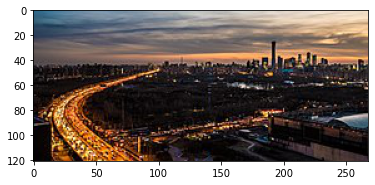

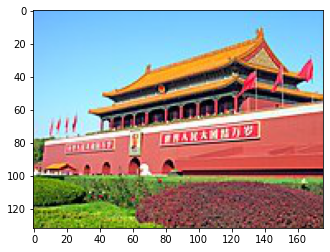

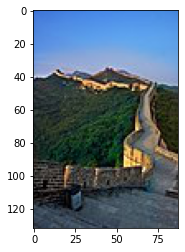

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

filepath = r'./data/demo data/Beijing'

images = glob.glob(filepath + '\*.jpg')

for i in images[:3]:
    img = Image.open(i)
    plt.imshow(img)
    plt.show()